<a href="https://colab.research.google.com/github/222010303005/Final-Year-Mini-Project_7016/blob/main/Reviews_Final_Models_with_class_inbalance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BUILDING VARIOUS MODELS

In [43]:
!pip install mlxtend

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_learning_curves

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
df = pd.read_excel('/content/drive/MyDrive/new_flipkart_labels.xlsx')
df.head()

,Unnamed: 0,review,review_lemm,scores,compound_score,label
0,0,more flexible bass is very high sound clarity...,flexible bass high sound clarity good batter...,"{'neg': 0.092, 'neu': 0.528, 'pos': 0.38, 'com...",0.8934,pos
1,1,super sound and good looking i like that prize,super sound good look like prize,"{'neg': 0.0, 'neu': 0.137, 'pos': 0.863, 'comp...",0.9118,pos
2,2,very much satisfied with the device at this pr...,satisfied device price point awesome brand des...,"{'neg': 0.0, 'neu': 0.535, 'pos': 0.465, 'comp...",0.9590,pos
3,3,nice headphone bass was very good and sound is...,nice headphone bass good sound clear purchase ...,"{'neg': 0.065, 'neu': 0.529, 'pos': 0.406, 'co...",0.8910,pos
4,4,sound quality super battery backup super quali...,sound quality super battery backup super quali...,"{'neg': 0.0, 'neu': 0.308, 'pos': 0.692, 'comp...",0.9584,pos


In [47]:
print(df.shape)

(3800, 6)


In [48]:
df['label'].value_counts()

pos    2481
neg     676
neu     643
Name: label, dtype: int64

  # Check for Missing values

In [49]:
df.isnull().sum()

Unnamed: 0        0
review            0
review_lemm       1
scores            0
compound_score    0
label             0
dtype: int64

In [50]:
df.dropna(inplace=True)

df.shape

(3799, 6)

In [51]:
from sklearn.model_selection import train_test_split
X = df['review_lemm']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# using Pipeline for vectorization and model building

In [52]:
# imporing pipeline and model libraries
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [53]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

In [54]:
# Naïve Bayes Pipeline:
text_clf_Mnb = Pipeline([('tfidf', TfidfVectorizer(ngram_range=(1, 1))),
                     ('clf', MultinomialNB()),])

# Linear SVC Pipeline:
text_clf_lsvc = Pipeline([('tfidf', TfidfVectorizer(ngram_range=(1, 1))),
                     ('clf', LinearSVC()),])

# Model 1: MultinomialNB

In [55]:
text_clf_Mnb.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [56]:
# Form a prediction set
predictions = text_clf_Mnb.predict(X_test)

In [57]:
predictions

array(['pos', 'pos', 'pos', ..., 'pos', 'pos', 'pos'], dtype='<U3')

In [58]:
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[  1   1 211]
 [  0  47 177]
 [  0   0 817]]


In [59]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         neg       1.00      0.00      0.01       213
         neu       0.98      0.21      0.35       224
         pos       0.68      1.00      0.81       817

    accuracy                           0.69      1254
   macro avg       0.89      0.40      0.39      1254
weighted avg       0.79      0.69      0.59      1254



In [60]:
print(metrics.accuracy_score(y_test,predictions))

0.689792663476874


([0.7125984251968503,
  0.6954813359528488,
  0.7024901703800787,
  0.7082514734774067,
  0.714622641509434,
  0.7170923379174853,
  0.7186973610331274,
  0.7200392927308448,
  0.731004366812227,
  0.7324165029469548],
 [0.6834130781499203,
  0.6698564593301436,
  0.6786283891547049,
  0.6794258373205742,
  0.6778309409888357,
  0.6834130781499203,
  0.6842105263157895,
  0.6834130781499203,
  0.6881977671451356,
  0.689792663476874])

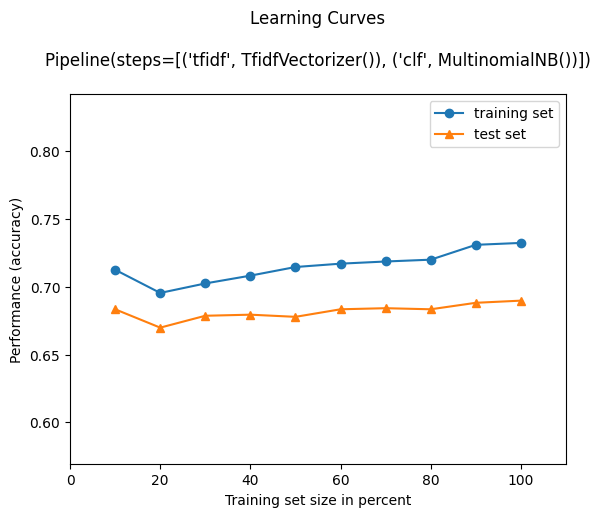

In [61]:
plot_learning_curves(X_train,y_train, X_test,y_test,text_clf_Mnb, scoring='accuracy')

In [62]:
#some new text without preprocessing
text1="I am happy with this product"
text2="I am too happy with this product"
text3="I am not happy with this product"
text4="the product cheated me too much"
text5="cant say"

In [63]:
print(text_clf_Mnb.predict([text1]))
print(text_clf_Mnb.predict([text2]))# be sure to put "text" inside square brackets
print(text_clf_Mnb.predict([text3]))
print(text_clf_Mnb.predict([text4]))
print(text_clf_Mnb.predict([text5]))

['pos']
['pos']
['pos']
['pos']
['pos']


# Model 2: Linear SVC

In [64]:
text_clf_lsvc.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [65]:
# Form a prediction set
predictions = text_clf_lsvc.predict(X_test)

In [66]:
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[120  20  73]
 [ 12 193  19]
 [ 31   8 778]]


In [67]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         neg       0.74      0.56      0.64       213
         neu       0.87      0.86      0.87       224
         pos       0.89      0.95      0.92       817

    accuracy                           0.87      1254
   macro avg       0.83      0.79      0.81      1254
weighted avg       0.86      0.87      0.86      1254



In [68]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.8700159489633174


([0.984251968503937,
  0.9901768172888016,
  0.9842726081258192,
  0.9833005893909627,
  0.9795597484276729,
  0.9777341191879503,
  0.9758562605277934,
  0.974950884086444,
  0.9737991266375546,
  0.9713163064833006],
 [0.8165869218500797,
  0.8349282296650717,
  0.8437001594896332,
  0.8572567783094099,
  0.8516746411483254,
  0.8564593301435407,
  0.8596491228070176,
  0.8628389154704944,
  0.8692185007974481,
  0.8700159489633174])

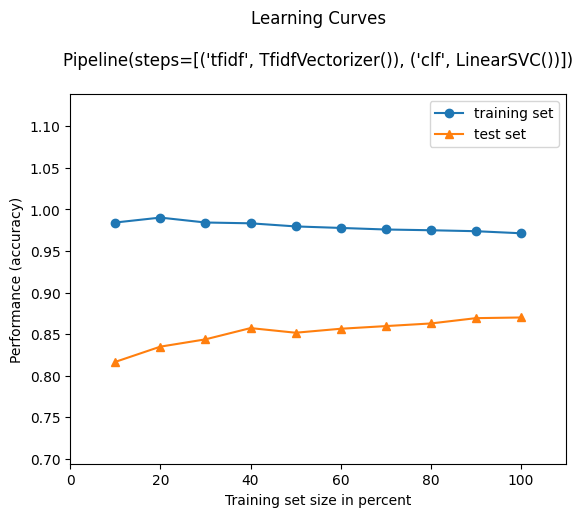

In [69]:
plot_learning_curves(X_train,y_train, X_test,y_test,text_clf_lsvc, scoring='accuracy')

In [70]:
print(text_clf_lsvc.predict([text1]))
print(text_clf_lsvc.predict([text2]))# be sure to put "text" inside square brackets
print(text_clf_lsvc.predict([text3]))
print(text_clf_lsvc.predict([text4]))
print(text_clf_lsvc.predict([text5]))

['pos']
['pos']
['pos']
['neg']
['neg']


# Model 3:Decision Tree Classifier

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
text_clf_Dt = Pipeline([('tfidf', TfidfVectorizer(ngram_range=(1, 1))),
                     ('clf',DecisionTreeClassifier()),
])

In [73]:
text_clf_Dt.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', DecisionTreeClassifier())])

In [74]:
predictions = text_clf_Dt.predict(X_test)

In [75]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[148  19  46]
 [ 15 198  11]
 [ 57  12 748]]


In [76]:
print(metrics.accuracy_score(y_test,predictions))

0.8724082934609251


([1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9993451211525868,
  0.9994385176866929,
  0.99950884086444,
  0.9995633187772925,
  0.999607072691552],
 [0.7432216905901117,
  0.79585326953748,
  0.8349282296650717,
  0.8269537480063796,
  0.8484848484848485,
  0.8564593301435407,
  0.8700159489633174,
  0.8596491228070176,
  0.8724082934609251,
  0.8787878787878788])

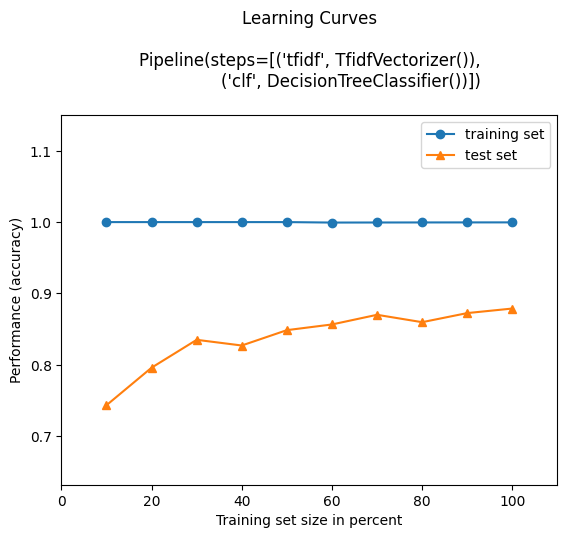

In [77]:
## learning curves
plot_learning_curves(X_train,y_train, X_test,y_test,text_clf_Dt , scoring='accuracy')

In [78]:
print(text_clf_Dt.predict([text1]))
print(text_clf_Dt.predict([text2]))# be sure to put "text" inside square brackets
print(text_clf_Dt.predict([text3]))
print(text_clf_Dt.predict([text4]))
print(text_clf_Dt.predict([text5]))

['pos']
['pos']
['pos']
['neu']
['neu']


# Model 4: Random Forest Classifier

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
text_clf_Rf = Pipeline([('tfidf', TfidfVectorizer(ngram_range=(1, 1))),
                     ('clf',RandomForestClassifier()),
])

In [81]:
text_clf_Rf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier())])

In [82]:
predictions = text_clf_Rf.predict(X_test)

In [83]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[129  22  62]
 [  3 184  37]
 [  7   4 806]]


In [84]:
print(metrics.accuracy_score(y_test,predictions))

0.8923444976076556


([1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9993451211525868,
  0.9994385176866929,
  0.99950884086444,
  0.9995633187772925,
  0.999607072691552],
 [0.8301435406698564,
  0.8500797448165869,
  0.8628389154704944,
  0.879585326953748,
  0.8859649122807017,
  0.8811802232854864,
  0.8843700159489634,
  0.8859649122807017,
  0.8819776714513556,
  0.8899521531100478])

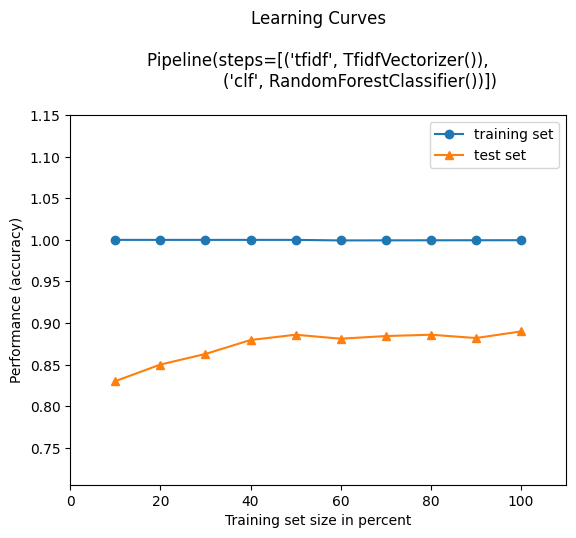

In [85]:
plot_learning_curves(X_train,y_train, X_test,y_test,text_clf_Rf , scoring='accuracy')

In [86]:
print(text_clf_Rf.predict([text1]))
print(text_clf_Rf.predict([text2]))# be sure to put "text" inside square brackets
print(text_clf_Rf.predict([text3]))
print(text_clf_Rf.predict([text4]))
print(text_clf_Rf.predict([text5]))

['pos']
['pos']
['pos']
['neu']
['neu']


# Model 5: XGboost Classifier

In [87]:
from xgboost import XGBClassifier

In [88]:
text_clf_xgb = Pipeline([('tfidf', TfidfVectorizer(ngram_range=(1,1))),
                     ('clf', XGBClassifier()),])

In [89]:
text_clf_xgb

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [90]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [91]:
text_clf_xgb.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [92]:
predictions = text_clf_xgb.predict(X_test)

In [93]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[139  22  52]
 [  7 206  11]
 [ 12   9 796]]


In [94]:
print(metrics.accuracy_score(y_test,predictions))

0.9098883572567783


([1.0,
  0.9960707269155207,
  0.9960681520314548,
  0.9960707269155207,
  0.9968553459119497,
  0.9947609692206941,
  0.9949466591802358,
  0.9926326129666012,
  0.9912663755458515,
  0.9897838899803536],
 [0.8141945773524721,
  0.8373205741626795,
  0.8755980861244019,
  0.8915470494417863,
  0.886762360446571,
  0.8931419457735247,
  0.8963317384370016,
  0.9035087719298246,
  0.9019138755980861,
  0.9098883572567783])

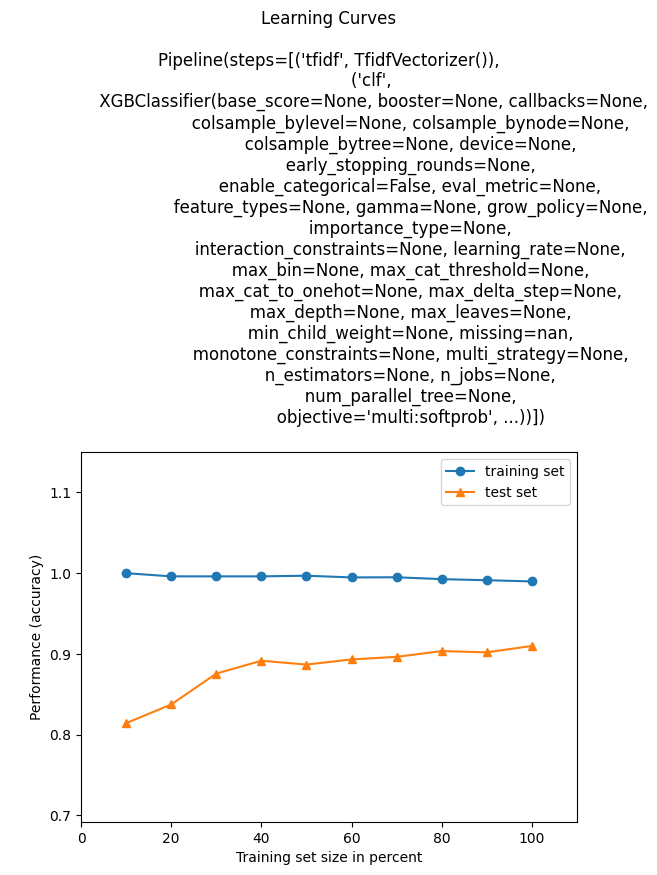

In [95]:
plot_learning_curves(X_train,y_train, X_test,y_test,text_clf_xgb, scoring='accuracy')

In [96]:
print(text_clf_xgb.predict([text1]))
print(text_clf_xgb.predict([text2]))# be sure to put "text" inside square brackets
print(text_clf_xgb.predict([text3]))
print(text_clf_xgb.predict([text4]))
print(text_clf_xgb.predict([text5]))

[2]
[2]
[2]
[1]
[1]


# Model 6: SGD

In [97]:
from sklearn.linear_model import SGDClassifier

In [98]:
text_clf_sgd = Pipeline([('tfidf', TfidfVectorizer(ngram_range=(1,1),norm=None,stop_words='english')),
                     ('clf', SGDClassifier()),])

In [99]:
text_clf_sgd.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(norm=None, stop_words='english')),
                ('clf', SGDClassifier())])

In [100]:
predictions = text_clf_sgd.predict(X_test)

In [101]:
print(metrics.accuracy_score(y_test,predictions))

0.8851674641148325


# Model 7: GradientBoostingClassifier

In [102]:
# gradientboosting classifier
from sklearn.ensemble import GradientBoostingClassifier

In [103]:
text_clf_GBC = Pipeline([('tfidf', TfidfVectorizer(ngram_range=(1,1),norm=None,stop_words='english')),
                     ('clf', GradientBoostingClassifier(n_estimators=100,learning_rate=0.5, max_depth=3, random_state=0)),])

In [104]:
text_clf_GBC.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(norm=None, stop_words='english')),
                ('clf',
                 GradientBoostingClassifier(learning_rate=0.5,
                                            random_state=0))])

In [105]:
predictions = text_clf_GBC.predict(X_test)

In [106]:
print(metrics.accuracy_score(y_test,predictions))

0.9003189792663477


In [107]:
print(text_clf_GBC.predict([text1]))
print(text_clf_GBC.predict([text2]))# be sure to put "text" inside square brackets
print(text_clf_GBC.predict([text3]))
print(text_clf_GBC.predict([text4]))
print(text_clf_GBC.predict([text5]))

[2]
[2]
[2]
[1]
[1]


# Model 8: GridsearchCV-XGB

In [108]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [109]:
tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None)

In [110]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [111]:
from nltk.corpus import stopwords

stop = stopwords.words('english')
param_grid = [
             {'vect__ngram_range': [(1,1),(1,2),(1,3)],
              'vect__stop_words': [stop, None],
              'clf__alpha': (1e-2, 1e-3),
              'vect__use_idf': [True,False],
              'vect__norm': [None]}]

lr_tfidf = Pipeline([('vect', tfidf), ('clf',XGBClassifier(random_state=0))])

gs_lr_tfidf = GridSearchCV(lr_tfidf, param_grid, scoring='accuracy', cv=3, verbose=1, n_jobs=-1)

gs_lr_tfidf.fit(X_train, y_train)

print('Best parameter set: %s' % gs_lr_tfidf.best_params_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best parameter set: {'clf__alpha': 0.001, 'vect__ngram_range': (1, 1), 'vect__norm': None, 'vect__stop_words': ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'the

In [112]:
predictions = gs_lr_tfidf.predict(X_test)

In [113]:
print(metrics.accuracy_score(y_test,predictions))

0.9074960127591707


In [114]:
print(gs_lr_tfidf.predict([text1]))
print(gs_lr_tfidf.predict([text2]))# be sure to put "text" inside square brackets
print(gs_lr_tfidf.predict([text3]))
print(gs_lr_tfidf.predict([text4]))
print(gs_lr_tfidf.predict([text5]))

[2]
[2]
[2]
[1]
[1]
